In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.

recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(recent_date)

('2017-08-23',)


Text(0, 0.5, 'Inches')

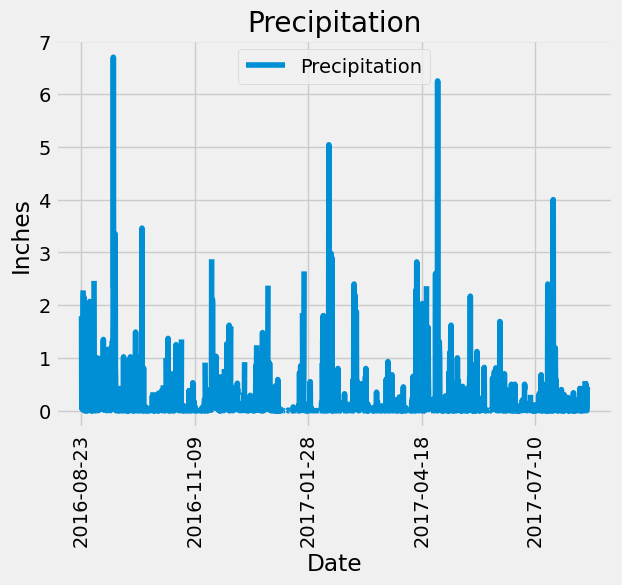

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date
# Calculate the date one year from the last date in data set.

last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
last_year_prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(last_year_prcp, columns=["Date", "Precipitation"]).set_index("Date")

# Sort the dataframe by date
prcp_df = prcp_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df
prcp_plot = prcp_df.plot(rot=90)

prcp_plot.set_title("Precipitation")
prcp_plot.set_xlabel("Date")
prcp_plot.set_ylabel("Inches")

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
#station_number = session.query(Station.station).count()
#station_number
session.query(func.count(Station.station)).all()

[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

# We can see which stations are the most and the least active.
# Station - USC00519281 have the most rows

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

# We will calculate the minimum, maximum, and average temperatures with the following functions: 
# func.min, func.max, and func.avg. 
# Also we'll be filtering out everything but the most active station - USC00519281. 
# Finally, add the .all() function to return our results as a list.

session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station=="USC00519281").all()

# The results show that the low (minimum) temperature is 54 degrees, 
# the high (maximum) temperature is 85 degrees, and 
# the average temperature is approximately 72 degrees.

[(54.0, 85.0, 71.66378066378067)]

Text(0, 0.5, 'Frequency')

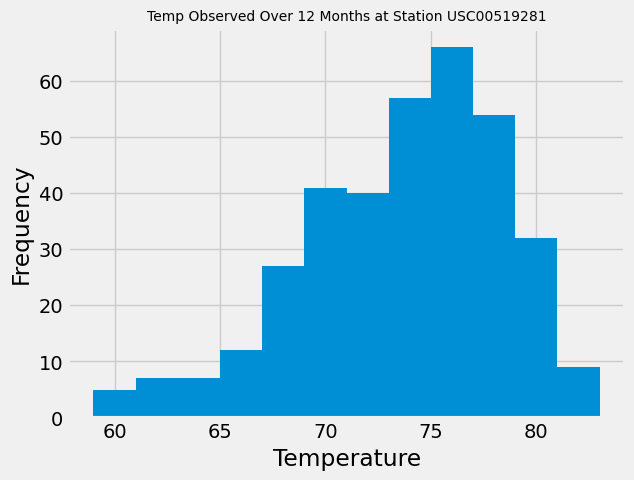

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#Query to find station with highest number of temp obvs
highest_tobs = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).first()


highest_tobs_station = "USC00519281"

#Find the final data point for that station
final_data_point = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == highest_tobs_station).order_by(Measurement.date.desc()).first()


start_date = dt.date(2017, 8, 18) - dt.timedelta(days=365)

#Query the last 12 months of temp obvs for that station, using the start and end dates found
temp_obs = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= start_date).\
    filter(Measurement.station == highest_tobs_station).all()


#Save results in DataFrame and Plot as a Histogram
tobs_df = pd.DataFrame(temp_obs, columns=["Date", "Temp Observed"])
plt.hist(tobs_df["Temp Observed"], bins=12)
plt.title("Temp Observed Over 12 Months at Station USC00519281", fontsize=10)
plt.xlabel("Temperature")
plt.ylabel("Frequency")

# Close Session

In [16]:
# Close Session
session.close()